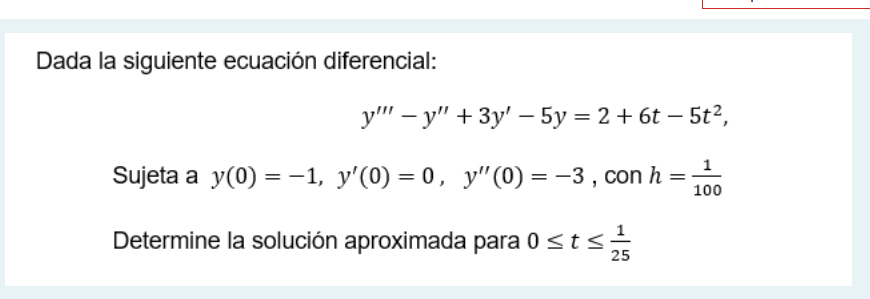

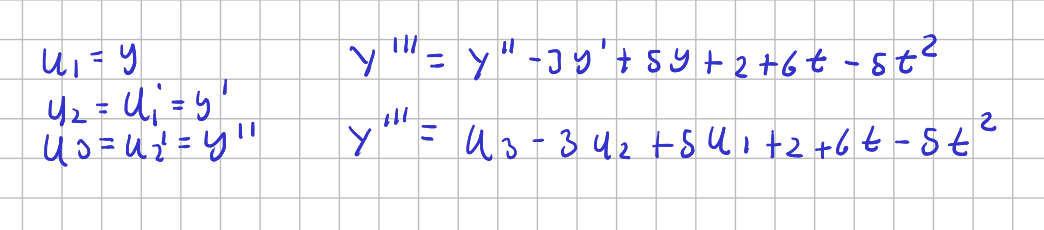


In [10]:
from sympy import *
from numpy import arange

fy = symbols("fy", cls=Function)
t, y, u1, u2, u3 = symbols("t y u1 u2 u3")

h = 1/100

fu1 = u2
fu2 = u3
fu3 = u3 - 3*u2 + 5*u1 + 2 + 6*t - 5*t**2

display(fu1)
display(fu2)
display(fu3)

u2

u3

-5*t**2 + 6*t + 5*u1 - 3*u2 + u3 + 2

In [11]:
# Intervalo de T
T = [t for t in arange(start=0,stop=1/25 + h/2, step=h)]
T

[0.0, 0.01, 0.02, 0.03, 0.04]

In [12]:
# Listas con los valores iniciales
# Para este caso

U1 = [-1]
U2 = [0]
U3 = [-3]

# Hago un for para calcular los K y U
for i in range(0, len(T) -1):
    k11 = fu1.subs({t: T[i], u1: U1[i], u2:U2[i], u3:U3[i]})
    k12 = fu2.subs({t: T[i], u1: U1[i], u2:U2[i], u3:U3[i]})
    k13 = fu3.subs({t: T[i], u1: U1[i], u2:U2[i], u3:U3[i]})

    k21 = fu1.subs({t: T[i] + h/2, u1: U1[i] + (k11*h)/2, u2:U2[i] + (k12*h)/2, u3:U3[i]+ (k13*h)/2})
    k22 = fu2.subs({t: T[i] + h/2, u1: U1[i] + (k11*h)/2, u2:U2[i] + (k12*h)/2, u3:U3[i]+ (k13*h)/2})
    k23 = fu3.subs({t: T[i] + h/2, u1: U1[i] + (k11*h)/2, u2:U2[i] + (k12*h)/2, u3:U3[i]+ (k13*h)/2})

    k31 = fu1.subs({t: T[i] + h/2, u1: U1[i] + (k21*h)/2, u2:U2[i] + (k22*h)/2, u3:U3[i]+ (k23*h)/2})
    k32 = fu2.subs({t: T[i] + h/2, u1: U1[i] + (k21*h)/2, u2:U2[i] + (k22*h)/2, u3:U3[i]+ (k23*h)/2})
    k33 = fu3.subs({t: T[i] + h/2, u1: U1[i] + (k21*h)/2, u2:U2[i] + (k22*h)/2, u3:U3[i]+ (k23*h)/2})

    k41 = fu1.subs({t: T[i] + h, u1: U1[i] + k31*h, u2:U2[i] + k32*h, u3:U3[i] + k33*h})
    k42 = fu2.subs({t: T[i] + h, u1: U1[i] + k31*h, u2:U2[i] + k32*h, u3:U3[i] + k33*h})
    k43 = fu3.subs({t: T[i] + h, u1: U1[i] + k31*h, u2:U2[i] + k32*h, u3:U3[i] + k33*h})

    U1.append(U1[i] + (h/6)*(k11 + 2*k21 + 2*k31 + k41))
    U2.append(U2[i] + (h/6)*(k12 + 2*k22 + 2*k32 + k42))
    U3.append(U3[i] + (h/6)*(k13 + 2*k23 + 2*k33 + k43))

print(U1)
print(U2)
print(U3)

[-1, -1.00015099626042, -1.00060793997476, -1.00137669593432, -1.00246303864983]
[0, -0.0302984991770833, -0.0611879880633807, -0.0926594435453631, -0.124703833541525]
[-3, -3.05954968956250, -3.11819770034731, -3.17594285923542, -3.23278454596452]


In [13]:
# Pruebo la evaluación exacta para verificar contra y
eq = Eq(fy(t).diff(t, 3)- fy(t).diff(t, 2) + 3*fy(t).diff() -5*fy(t), 2 +6*t - 5*t**2)
condiciones_iniciales = {fy(t).subs(t, 0):-1,fy(t).diff().subs(t,0): 0, fy(t).diff(t ,2).subs(t,0): -3 }
F = dsolve(eq, ics=condiciones_iniciales)
F

solucion_exacta = []
for i in range(len(T)):
    solucion_exacta.append(float(F.rhs.subs({t: T[i]})))
solucion_exacta

[-1.0,
 -1.0001509962484099,
 -1.0006079399515597,
 -1.0013766959007544,
 -1.0024630386067166]

In [15]:

from utils import imprimir_tabla

lista_tabla = [["ti", "U1", "U2", "U3", "Exacta U1", "Error"]]

for i in range(len(T)):
    lista_tabla.append(
        [
            str(float(T[i])),
            str(float(U1[i])),
            str(float(U2[i])),
            str(float(U3[i])),
            str(solucion_exacta[i]),
            str(f"{abs(U1[i] - solucion_exacta[i]):.5E}"),
        ]
    )

imprimir_tabla(lista_tabla)

┏━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ ti   ┃ U1                  ┃ U2                   ┃ U3                  ┃ Exacta U1           ┃ Error       ┃
┡━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ 0.0  │ -1.0                │ 0.0                  │ -3.0                │ -1.0                │ 0.00000E+00 │
│ 0.01 │ -1.0001509962604167 │ -0.03029849917708333 │ -3.0595496895625    │ -1.0001509962484099 │ 1.20068E-11 │
│ 0.02 │ -1.000607939974758  │ -0.06118798806338072 │ -3.118197700347307  │ -1.0006079399515597 │ 2.31983E-11 │
│ 0.03 │ -1.0013766959343238 │ -0.0926594435453631  │ -3.175942859235416  │ -1.0013766959007544 │ 3.35694E-11 │
│ 0.04 │ -1.0024630386498308 │ -0.12470383354152507 │ -3.2327845459645173 │ -1.0024630386067166 │ 4.31142E-11 │
└──────┴─────────────────────┴──────────────────────┴─────────────────────┴─────────────────────┴─────────────┘